<a href="https://colab.research.google.com/github/jrigottiedu/TT-2C2025-Data-Analitycs-Notebooks/blob/main/Clase_9/Clase_9_Estadistica_descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Terminología

* Observaciones: son las unidades sobre las cuales se miden los datos
* Población: es el conjunto de todas las unidades de estudio
* Muestra: es un conjunto de observaciones de la población
* Variable: es una característica particular de la población que se recolecta estadísticamente

# Medidas de tendendia central

Las medidas de tendencia central son fundamentales en estadística, ya que nos
permiten resumir un conjunto de datos mediante un valor que representa el centro
de la distribución. Las tres medidas más comunes son la `media`, la `mediana` y
la `moda`.

In [1]:
import pandas as pd

In [39]:
# Creamos una Serie con los notas
notas1 = pd.Series([4,7,5,9,7,9],
                   name="Calificaciones")

In [20]:
notas1

,index,Calificaciones
0,0,4
1,1,5
2,2,7
3,3,7
4,4,9


## Media
La media, o promedio, es la suma de todos los valores de un conjunto de datos
dividida por la cantidad total de valores. Se expresa de la siguiente manera:

In [4]:
media1 = sum(notas1)/len(notas1)
media1

6.4

In [18]:
# Calculamos la media del peso de los paquetes
media1 = notas1.mean()
media1

,0
index,2.0
Calificaciones,6.4


## Mediana
La mediana es el valor que se encuentra en el medio de un conjunto de datos
cuando están ordenados. Si el número de observaciones es impar, la mediana es el
valor central; si es par, se promedian los dos valores centrales.

In [29]:
notas1 = notas1.sort_values()
notas1 = notas1.reset_index(drop=True)
notas1

,Calificaciones
0,4
1,5
2,7
3,7
4,9


In [30]:
mediana1 = notas1.median()
mediana1

7.0

In [31]:
# Creamos una Serie con cantidad par de notas
notas2 = pd.Series([4,5,6,7,8,9],
                name="Calificaciones")

In [32]:
notas2 = notas2.sort_values()
notas2 = notas2.reset_index(drop=True)
notas2

,Calificaciones
0,4
1,5
2,6
3,7
4,8
5,9


In [33]:
# Calculamos la mediana del peso de los paquetes
mediana = notas2.median()
mediana

6.5

## Moda
La moda es el valor que aparece con mayor frecuencia en un conjunto de datos.

In [40]:
# Calculamos la moda del conjunto de pesos
moda1 = notas1.mode()
moda1

,Calificaciones
0,7
1,9


# Cuartiles y percentiles
Tanto los cuartiles como los percentiles son herramientas estadísticas valiosas para
resumir datasets, identificar outliers (valores atípicos) y entender la variabilidad en
los datos. Estas medidas permiten que los analistas tomen decisiones, al señalar
dónde se encuentran los valores extremos y cómo se distribuyen en relación con el
conjunto total.

In [42]:
puntuaciones = pd.Series([56,74,68,82,90,62,78,84,88,95,56,74,68,82,90,62,78,84,88,95])
# puntuaciones = pd.Series([16,74,68,82,90,62,78,84,88,95,56,74,68,82,90,62,78,84,88,95])

In [43]:
media = puntuaciones.mean()
mediana = puntuaciones.median()
Q1 = puntuaciones.quantile(0.25)
Q2 = puntuaciones.quantile(0.50)
Q3 = puntuaciones.quantile(0.75)

In [44]:
print(f"Q1: {Q1}")
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Q2: {Q2}")
print(f"Q3: {Q3}")

Q1: 68.0
Media: 77.7
Mediana: 80.0
Q2: 80.0
Q3: 88.0


In [45]:
import numpy as np

# Cálculo de cuartiles
Q1 = np.percentile(puntuaciones, 25)
Q2 = np.percentile(puntuaciones, 50) # Mediana
Q3 = np.percentile(puntuaciones, 75)
print(f"Primer cuartil (Q1): {Q1}")
print(f"Segundo cuartil (Q2 - Mediana): {Q2}")
print(f"Tercer cuartil (Q3): {Q3}")

Primer cuartil (Q1): 68.0
Segundo cuartil (Q2 - Mediana): 80.0
Tercer cuartil (Q3): 88.0


# Rango intercuartil
El rango intercuartílico (RIC) es una medida de dispersión que describe la variabilidad de la mitad central de un conjunto de datos.
<BR>
Se calcula como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1):
<BR>

`RIC=Q3-Q1`

<BR>

* Es una medida de variabilidad: muestra cuánto se dispersan los datos alrededor de la mediana.

* Es robusta frente a valores atípicos y, por eso, es muy útil en distribuciones sesgadas.

* Se visualiza fácilmente en un diagrama de caja (boxplot), donde representa el “cuerpo” o caja central que contiene el 50% de los datos.*


In [46]:
# Calculamos el RIC de las puntuaciones
RIC = Q3 - Q1
RIC

np.float64(20.0)

In [47]:
# Validamos con el describe
puntuaciones.describe()

,0
count,20.000000
mean,77.700000
std,12.312168
min,56.000000
25%,68.000000
50%,80.000000
75%,88.000000
max,95.000000


# Outlier
Un outlier se define como una observación inferior al primer cuartil o superior al tercer cuartil, cuya distancia excede `1.5*RIC`

In [48]:
# En nuestro caso:
outlier_superior = Q3 + 1.5*RIC
outlier_inferior = Q1 - 1.5*RIC
print(f"Outlier superior: {outlier_superior}")
print(f"Outlier inferior: {outlier_inferior}")

Outlier superior: 118.0
Outlier inferior: 38.0


# Boxplot
Un boxplot, también conocido como diagrama de
caja y bigotes, es un gráfico que muestra cómo se
distribuyen los datos numéricos.
* Muestra la mediana y los cuartiles de los
datos
* Identifica valores atípicos
* Permite intuir la morfología y simetría de los
datos
* Se puede dibujar más de un diagrama de
caja por gráfico

Componentes:
* Cajas: Representan el rango intercuartílico (IQR) de los datos
* Bigotes: Son líneas que se extienden desde ambos extremos de la caja.
* Valores atípicos: Son puntos fuera de los bigotes considerados inusuales o
extremos
* Gorros: Son líneas perpendiculares en los extremos de los bigotes

/tmp/ipython-input-2458614703.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


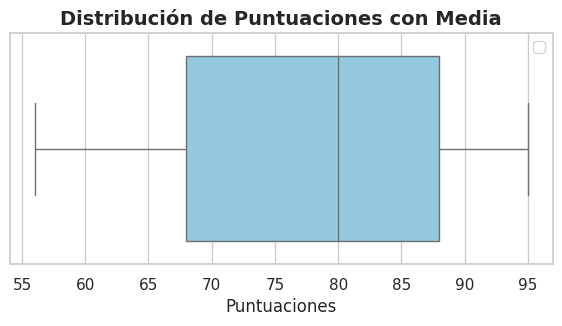

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la Serie
puntuaciones = pd.Series(
    [56,74,68,82,90,62,78,84,88,95,56,74,68,82,90,62,78,84,88,95],
    name="Puntuaciones"
)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(7, 3))

# Crear el boxplot
sns.boxplot(x=puntuaciones, color="skyblue")

# Calcular y graficar la media
# media = puntuaciones.mean()
# plt.axvline(media, color="red", linestyle="--", linewidth=2, label=f"Media = {media:.1f}")

# Personalizar
plt.title("Distribución de Puntuaciones con Media", fontsize=14, fontweight="bold")
plt.xlabel("Puntuaciones", fontsize=12)
plt.legend()

plt.show()

# Medidas de variabilidad o de dispersión

Las medidas de dispersión nos brindan información sobre la variabilidad de los
datos, es decir, cuán alejados están estos valores de la tendencia central. Las más utilizadas son el `rango`, la `varianza` y la `desviación standard`.

## Rango
El rango es la diferencia entre el valor máximo y el mínimo de un conjunto de datos.

In [60]:
puntuaciones.describe()

,Puntuaciones
count,20.000000
mean,77.700000
std,12.312168
min,56.000000
25%,68.000000
50%,80.000000
75%,88.000000
max,95.000000


In [59]:
minimo = puntuaciones.min()
maximo = puntuaciones.max()
rango = maximo - minimo
print(f"Rango: {rango}")

Rango: 39


In [61]:
# Calculado con np
rango = np.max(puntuaciones) - np.min(puntuaciones)
rango

39

## Varianza
La varianza mide cuán dispersos están los valores respecto a la media. Se calcula
como el promedio de las diferencias al cuadrado entre cada valor y la media:

In [62]:
varianza = np.var(puntuaciones)
print(f"La varianza es: {varianza}")

La varianza es: 144.01000000000005


## Desvío Standard
La desviación standard es la raíz cuadrada de la varianza, proporcionando una
medida de dispersión en las mismas unidades que los datos originales. Se calcula
de la siguiente manera:

In [63]:
desviacion_estandar = np.std(puntuaciones)
desviacion_estandar

12.000416659433123

# Histograma
Un histograma es una representación gráfica que muestra cómo se distribuyen los datos numéricos.
Divide los valores en intervalos (bins) y muestra cuántos datos caen en cada intervalo.
<BR>
* El eje X representa los valores (por ejemplo, las puntuaciones).

* El eje Y muestra la frecuencia (cuántos datos hay en cada bin).

* Permite visualizar la forma de la distribución: si es simétrica, sesgada, o tiene valores atípicos.

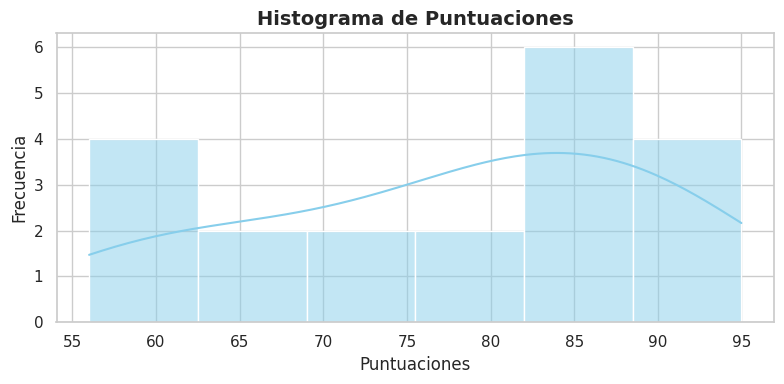

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos
puntuaciones = pd.Series(
    [56,74,68,82,90,62,78,84,88,95,56,74,68,82,90,62,78,84,88,95],
    name="Puntuaciones"
)

# Configurar estilo
sns.set_theme(style="whitegrid")

# Crear histograma
plt.figure(figsize=(8, 4))
sns.histplot(puntuaciones, bins="auto", kde=True, color="skyblue")

# Personalizar
plt.title("Histograma de Puntuaciones", fontsize=14, fontweight="bold")
plt.xlabel("Puntuaciones")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


# Actividad con el dataset Iris

El dataset Iris es uno de los conjuntos de datos más clásicos y utilizados en estadística, aprendizaje automático y análisis exploratorio de datos.
Fue introducido por el botánico Ronald A. Fisher en 1936 para demostrar técnicas de clasificación.
<BR>
Contiene 150 observaciones de flores del género Iris, distribuidas en 3 especies:

* Iris setosa
* Iris versicolor
* Iris virginica

<BR>
Cada flor se describe mediante cuatro variables numéricas continuas (en centímetros):

<BR>
Variable	Descripción
* sepal_length	Largo del sépalo
* sepal_width	Ancho del sépalo
* petal_length	Largo del pétalo
* petal_width	Ancho del pétalo

[Ver imagen](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEj7e_IQ2IK_SRV1ve4spY-6jp2a7UBF7SKvEHM7IMxo1QqwG89su7mLRbC-r-FsDFQ4SDTW7A9B0P0IpqGBU2JQw4YRiVKLunvR2qnOGyZX179z0XDvnSxa6OVs85QufIq4ajAzwg/s640/Flor+partes.jpg)




In [65]:
# Cargar los datos desde la URL
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
iris = pd.read_csv(url)

# Ver las primeras filas
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
# Veamos más detalles con info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [71]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [74]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [75]:
iris.groupby("species").describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [76]:
iris.groupby("species").agg({
    "sepal_length": ["mean", "std", "min", "max"],
    "sepal_width":  ["mean", "std", "min", "max"],
    "petal_length": ["mean", "std", "min", "max"],
    "petal_width":  ["mean", "std", "min", "max"]
})

sepal_length                     sepal_width                      \
                   mean       std  min  max        mean       std  min  max   
species                                                                       
setosa            5.006  0.352490  4.3  5.8       3.418  0.381024  2.3  4.4   
versicolor        5.936  0.516171  4.9  7.0       2.770  0.313798  2.0  3.4   
virginica         6.588  0.635880  4.9  7.9       2.974  0.322497  2.2  3.8   

           petal_length                     petal_width                      
                   mean       std  min  max        mean       std  min  max  
species                                                                      
setosa            1.464  0.173511  1.0  1.9       0.244  0.107210  0.1  0.6  
versicolor        4.260  0.469911  3.0  5.1       1.326  0.197753  1.0  1.8  
virginica         5.552  0.551895  4.5  6.9       2.026  0.274650  1.4  2.5

In [72]:
# Y algo de estadísticas:
iris[iris["species"]=="setosa"].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


/tmp/ipython-input-4239838558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x="species", y="sepal_length", palette="crest")


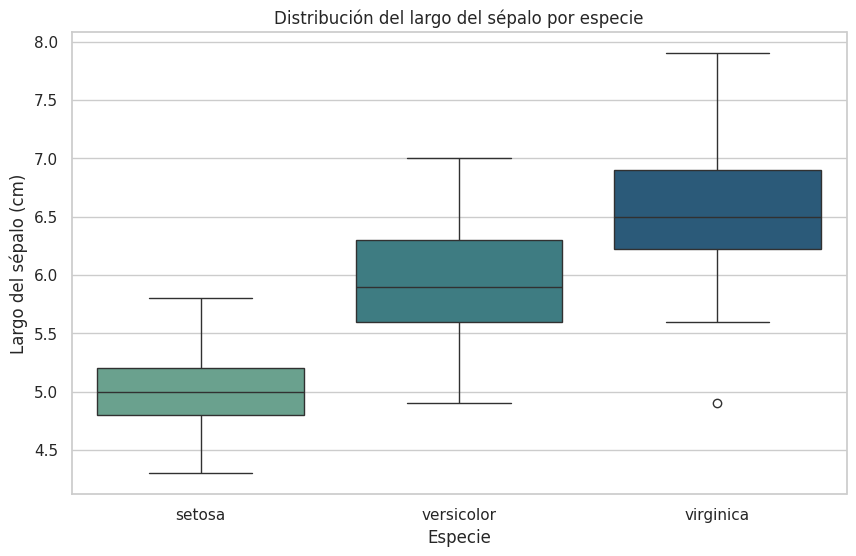

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(data=iris, x="species", y="sepal_length", palette="crest")
plt.title("Distribución del largo del sépalo por especie")
plt.xlabel("Especie")
plt.ylabel("Largo del sépalo (cm)")
plt.show()


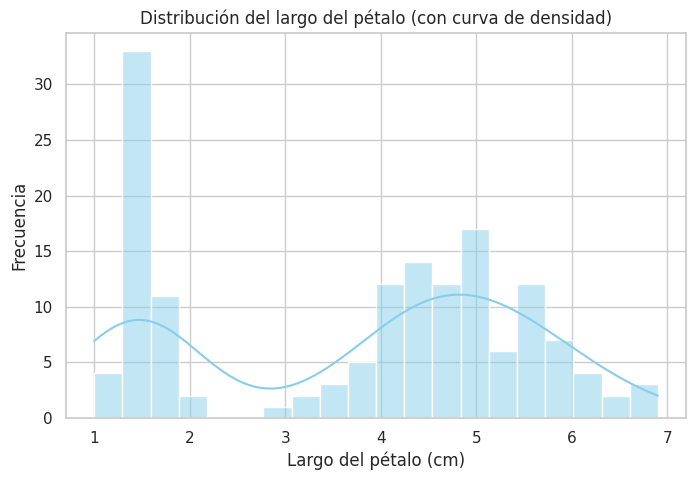

In [69]:
plt.figure(figsize=(8,5))
sns.histplot(iris["petal_length"], bins=20, kde=True, color="skyblue")
plt.title("Distribución del largo del pétalo (con curva de densidad)")
plt.xlabel("Largo del pétalo (cm)")
plt.ylabel("Frecuencia")
plt.show()


## Ejercicio
Elegir al menos una variable categórica (sepal with, por ejemplo) y calcular:
* media
* mediana
* RIC
* outliers inferior/superio
* rango
* varianza
* desvío standard